In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
adjs = np.load('../data/dilated_connection_matrix.npy')

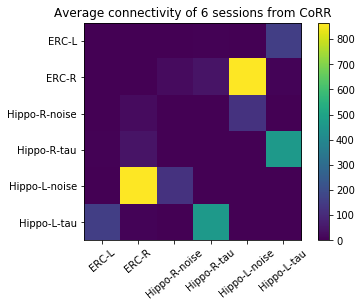

In [3]:
plt.imshow(np.mean(adjs, axis=2))
labs = ['ERC-L', 'ERC-R',
        'Hippo-R-noise', 'Hippo-R-tau',
        'Hippo-L-noise', 'Hippo-L-tau']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
plt.colorbar()
plt.show()

In [4]:
avg = np.mean(adjs, axis=2)
avg2 = np.asarray((avg[1:3,:], avg[0,:], avg[3:,:]))
avg[1:3,:]
# plt.imshow(np.log(avg+1))
# labs = ['ERC-R', 'Hippo-R-noise', 'Hippo-R-tau',
#         'ERC-L', 'Hippo-L-noise', 'Hippo-L-tau']
# plt.xticks(np.arange(0, 6), labs, rotation=40)
# plt.yticks(np.arange(0, 6), labs)
# plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
# plt.colorbar()
# plt.show()

array([[  1.22807018e-01,   0.00000000e+00,   2.65614035e+01,
          4.51140351e+01,   8.64210526e+02,   7.41228070e+00],
       [  0.00000000e+00,   2.65614035e+01,   0.00000000e+00,
          1.75438596e-02,   1.27710526e+02,   3.50877193e-02]])

## Unweighted Analysis

In [59]:
lhs = stats.ttest_ind(adjs[0,4,:], adjs[0,5,:])
rhs = stats.ttest_ind(adjs[1,2,:], adjs[1,3,:])
print("Left: {}".format(lhs))
print("Right: {}".format(rhs))

Left: Ttest_indResult(statistic=-18.621691313298488, pvalue=1.5662116856543693e-47)
Right: Ttest_indResult(statistic=-1.1537070248498371, pvalue=0.24983892788176221)


(0, 175)

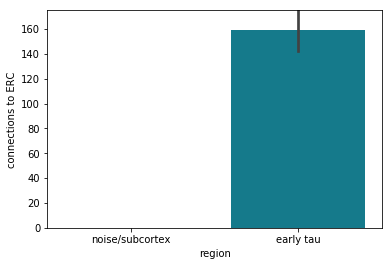

In [80]:
jnk_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,4,:]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,5,:]
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

plot = sns.barplot(x='region',y='connections to ERC',data=jnk_lhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])
plt.ylim([0, 175])

(0, 175)

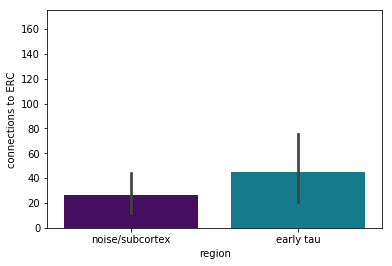

In [79]:
jnk_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[1,2,:]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[1,3,:]
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_rhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])
plt.ylim([0, 175])

## Weighted Analysis (Sizes)

In [24]:
size_n_dist = pd.read_csv('../data/sizes_distances_dilated.csv')
size_n_dist

,size,roi,dist_to_L_ERC,dist_to_R_ERC
0,4649,L_ERC,NaN,NaN
1,4205,R_ERC,NaN,NaN
2,2725,R_Noise,57.816892,28.600430
3,1720,R_Tau,49.380698,14.566127
4,1913,L_noise,30.714319,58.712851
5,2361,L_tau,16.800704,49.227287


In [68]:
size_lhs = stats.ttest_ind(adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]['size'].values,
                           adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]['size'].values)
size_rhs = stats.ttest_ind(adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Noise"]['size'].values,
                           adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Tau"]['size'].values)
print("Left: {}".format(size_lhs))
print("Right: {}".format(size_rhs))

Left: Ttest_indResult(statistic=-18.621190254824022, pvalue=1.5720049607651104e-47)
Right: Ttest_indResult(statistic=-1.9267950545762198, pvalue=0.055259140654967488)


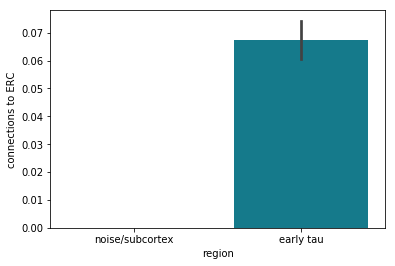

In [78]:
jnk_size_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]["size"].values
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]["size"].values
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_lhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])

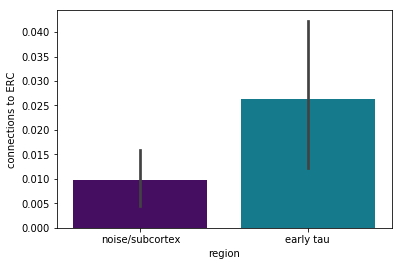

In [76]:
jnk_size_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Noise"]["size"].values
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Tau"]["size"].values
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_rhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])

## Weighted Analysis (Distance)

In [69]:
dist_lhs = stats.ttest_ind(adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]['dist_to_L_ERC'].values,
                           adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]['dist_to_L_ERC'].values)
dist_rhs = stats.ttest_ind(adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Noise"]['dist_to_R_ERC'].values,
                           adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Tau"]['dist_to_R_ERC'].values)
print("Left: {}".format(dist_lhs))
print("Right: {}".format(dist_rhs))

Left: Ttest_indResult(statistic=-18.62264833625299, pvalue=1.5552058745227988e-47)
Right: Ttest_indResult(statistic=-2.1968197784031807, pvalue=0.029049504553411275)


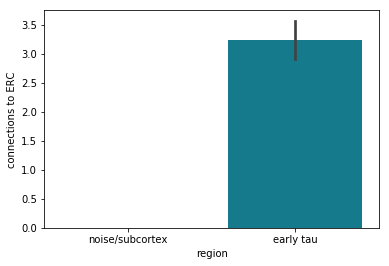

In [75]:
jnk_dist_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]['dist_to_R_ERC'].values
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]['dist_to_R_ERC'].values
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_lhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])

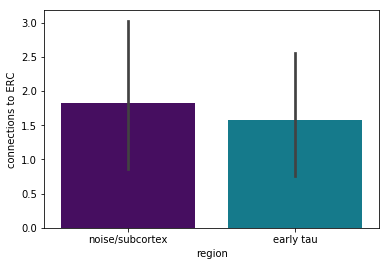

In [73]:
jnk_dist_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Tau"]['dist_to_R_ERC'].values
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Noise"]['dist_to_R_ERC'].values
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_rhs, palette=[sns.xkcd_rgb["royal purple"], sns.xkcd_rgb["teal blue"]])

## Weighted by distance *and* size

In [83]:
dist_sz_lhs = stats.ttest_ind((adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]['dist_to_L_ERC'].values/size_n_dist[size_n_dist.roi == "L_noise"]['size'].values), 
                            (adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]['dist_to_L_ERC'].values/size_n_dist[size_n_dist.roi == "L_tau"]['size'].values))
dist_sz_rhs = stats.ttest_ind((adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Noise"]['dist_to_R_ERC'].values/size_n_dist[size_n_dist.roi == "R_Noise"]['size'].values), 
                            (adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Tau"]['dist_to_R_ERC'].values/size_n_dist[size_n_dist.roi == "R_Tau"]['size'].values))
print("Left: {}".format(dist_sz_lhs))
print("Right: {}".format(dist_sz_rhs))

Left: Ttest_indResult(statistic=-18.622379339572973, pvalue=1.5582914997465423e-47)
Right: Ttest_indResult(statistic=-2.6138244490173688, pvalue=0.009555130680598975)


Text(0.5,1,u'Left Hemisphere')

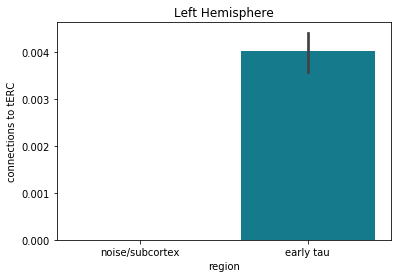

In [84]:
jnk_l = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_l.loc[jnk_l.index[:adjs.shape[2]],'connections to tERC'] = (adjs[0,4,:]/size_n_dist[size_n_dist.roi == "L_noise"]['dist_to_L_ERC'].values/size_n_dist[size_n_dist.roi == "L_noise"]['size'].values)
jnk_l.loc[jnk_l.index[adjs.shape[2]]:,'connections to tERC'] = (adjs[0,5,:]/size_n_dist[size_n_dist.roi == "L_tau"]['dist_to_L_ERC'].values/size_n_dist[size_n_dist.roi == "L_tau"]['size'].values)
jnk_l.loc[jnk_l.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_l.loc[jnk_l.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_l, palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Left Hemisphere')

Text(0.5,1,u'Right Hemisphere')

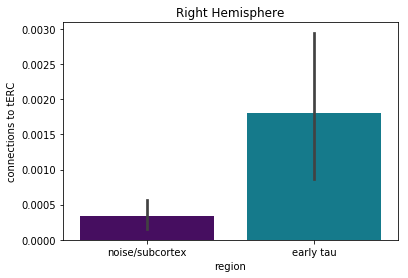

In [86]:
jnk_r = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_r.loc[jnk_r.index[:adjs.shape[2]],'connections to tERC'] = (adjs[1,2,:]/size_n_dist[size_n_dist.roi == "R_Noise"]['dist_to_R_ERC'].values/size_n_dist[size_n_dist.roi == "R_Noise"]['size'].values)
jnk_r.loc[jnk_r.index[adjs.shape[2]]:,'connections to tERC'] = (adjs[1,3,:]/size_n_dist[size_n_dist.roi == "R_Tau"]['dist_to_R_ERC'].values/size_n_dist[size_n_dist.roi == "R_Tau"]['size'].values)
jnk_r.loc[jnk_r.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_r.loc[jnk_r.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_r,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Right Hemisphere')

(Below are old data but formatting used in first poster)

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


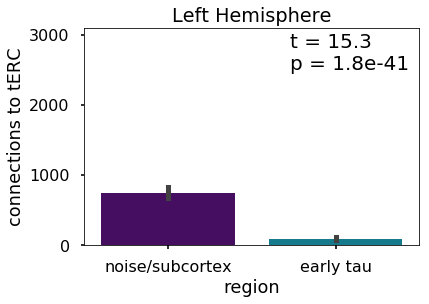

In [90]:
sns.set_context('poster')
jnk_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[0,1,:]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[0,2,:]
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_lhs,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Left Hemisphere')
plt.ylim(0,3100)
plt.text(.73, 2500,'t = %s\np = %s'%(float('%.3g' % lhs_t),float('%.2g' % lhs_p)), fontsize=20)
plt.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/CNXLeftHemisphere.pdf')

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


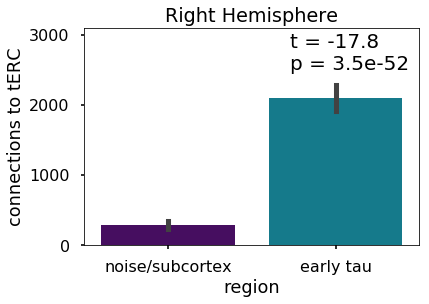

In [89]:
jnk_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[3,4,:]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[3,5,:]
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_rhs,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Right Hemisphere')
plt.ylim(0,3100)
plt.text(.73, 2500,'t = %s\np = %s'%(float('%.3g' % rhs_t),float('%.2g' % rhs_p)), fontsize=20)
plt.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/CnxRightHemisphere.pdf')